<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#### Read the data

Load the csv file and print the first five observations.

In [20]:
df=pd.read_csv('rainfall_prediction.csv')
df.head()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,3.6,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,2,0.0,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,3,0.0,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,4,0.8,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,5,40.4,3.0,3.6,18.725,35.333333,81.5,1005.60,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
Obs_Id          1520 non-null int64
Rainfall        1520 non-null float64
Evaporation     1520 non-null float64
Sunshine        1520 non-null float64
Temp            1520 non-null float64
Wind_Speed      1520 non-null float64
Humidity        1520 non-null float64
Pressure        1520 non-null float64
RainTomorrow    1520 non-null int64
dtypes: float64(7), int64(2)
memory usage: 107.0 KB


In [22]:
df.shape

(1520, 9)

In [23]:
df.isnull().sum()

Obs_Id          0
Rainfall        0
Evaporation     0
Sunshine        0
Temp            0
Wind_Speed      0
Humidity        0
Pressure        0
RainTomorrow    0
dtype: int64

In [24]:
df.corr()

,Obs_Id,Rainfall,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
Obs_Id,1.000000,0.013049,-0.031496,0.012289,-0.037399,0.013679,0.007504,-0.002640,0.023220
Rainfall,0.013049,1.000000,-0.078871,-0.242753,0.033095,0.076368,0.286686,-0.178015,0.226263
Evaporation,-0.031496,-0.078871,1.000000,0.374250,0.643564,0.269741,-0.530724,-0.330604,-0.102184
Sunshine,0.012289,-0.242753,0.374250,1.000000,0.338052,0.028162,-0.592967,0.007931,-0.453372
Temp,-0.037399,0.033095,0.643564,0.338052,1.000000,0.122074,-0.364721,-0.487932,-0.058752
Wind_Speed,0.013679,0.076368,0.269741,0.028162,0.122074,1.000000,-0.160412,-0.345703,0.188175
Humidity,0.007504,0.286686,-0.530724,-0.592967,-0.364721,-0.160412,1.000000,0.072248,0.365936
Pressure,-0.002640,-0.178015,-0.330604,0.007931,-0.487932,-0.345703,0.072248,1.000000,-0.235044
RainTomorrow,0.023220,0.226263,-0.102184,-0.453372,-0.058752,0.188175,0.365936,-0.235044,1.000000


**The data definition is as follows:** <br>

**Obs_Id:** Observation Id

**Rainfall:** Rainfall recorded in a day (in mm) 

**Evaporation:** Number of field goals made 

**Sunshine:** Number of hours of bright sunshine per day

**Temp:** Temperature in degree C

**Wind_Speed:** Average speed of the wind in km/hour

**Humidity:** Humidity in percentage (%)

**Pressure:** Atmospheric pressure in hpa (hecto Pascals)

**Rain Tomorrow:** Whether it will rain or not(0 = No, it won't rain tomorrow, 1 = Yes, it will rain tomorrow) (target/dependent variable)

Our objective is to predict whether it will rain tomorrow or not.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Identify and remove the variables in the data which are insignificant for the classification analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df.var().sort_values(ascending=False)

Obs_Id          192660.000000
Humidity           321.829595
Wind_Speed          74.886617
Rainfall            53.616498
Pressure            48.415148
Temp                40.715853
Sunshine            13.609383
Evaporation         13.249551
RainTomorrow         0.154490
dtype: float64

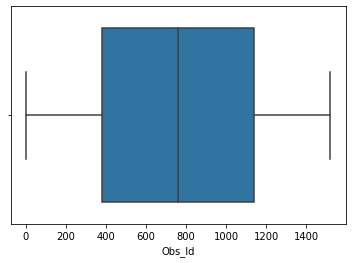

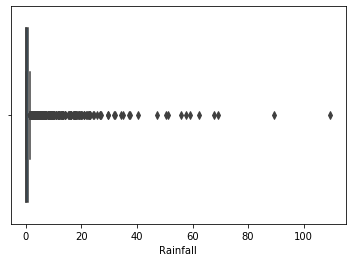

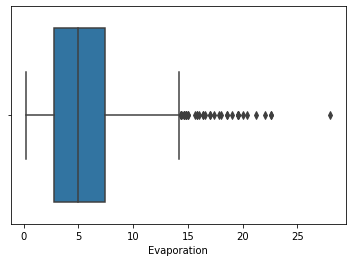

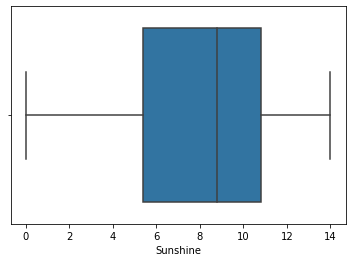

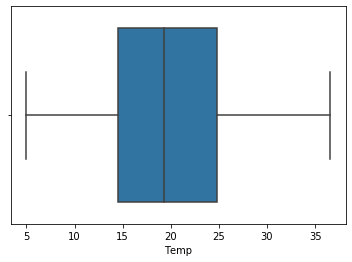

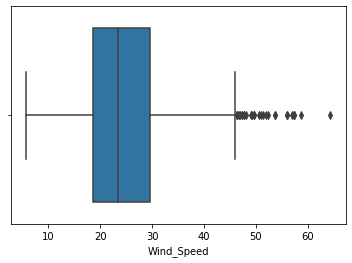

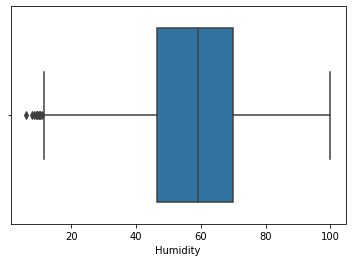

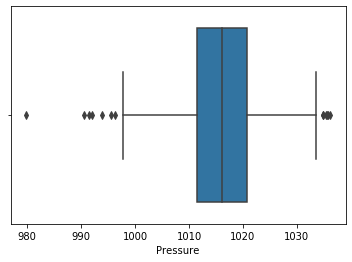

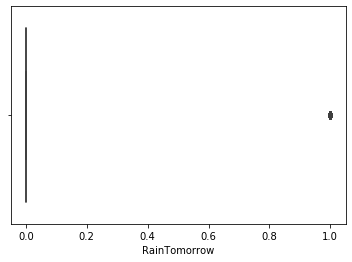

In [25]:
y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)

num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [26]:
df['Rainfall'].value_counts()

0.0     1014
0.2       86
0.4       35
0.6       32
0.8       21
        ... 
32.2       1
19.8       1
17.6       1
16.8       1
67.8       1
Name: Rainfall, Length: 114, dtype: int64

In [27]:
# Rainfall column has almost the same values. So, dropping it.

df=df.drop('Rainfall',axis=1)
df.head()

,Obs_Id,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,1.0,3.0,14.225,12.333333,82.0,1028.10,0
1,2,7.2,4.9,23.075,44.333333,69.5,1015.65,1
2,3,0.6,1.5,10.175,16.666667,87.0,1026.45,0
3,4,2.4,0.5,19.000,42.666667,89.0,1010.05,1
4,5,3.0,3.6,18.725,35.333333,81.5,1005.60,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there any record that is recorded more than once? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df.duplicated().value_counts()

False    1520
dtype: int64

In [15]:
df['Obs_Id'].duplicated().value_counts()

False    1520
Name: Obs_Id, dtype: int64

In [14]:
# there is no duplicate value present in the data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any outliers present in the data? If yes, remove such observations using the quartiles of the variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

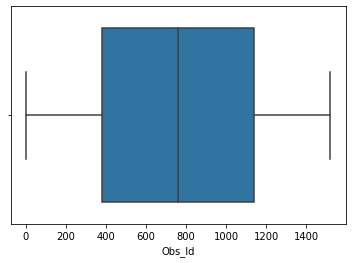

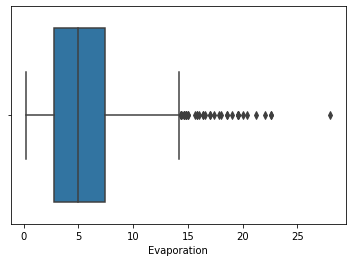

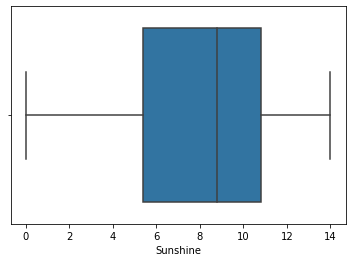

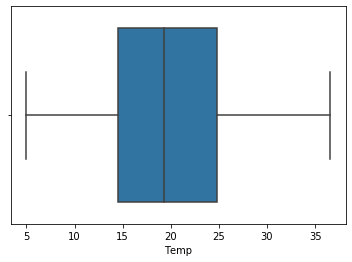

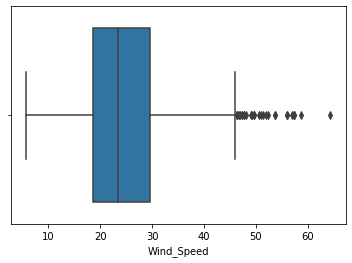

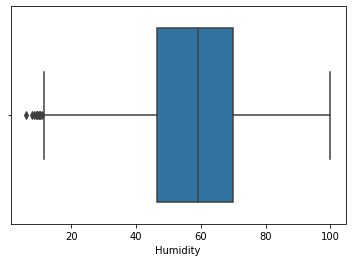

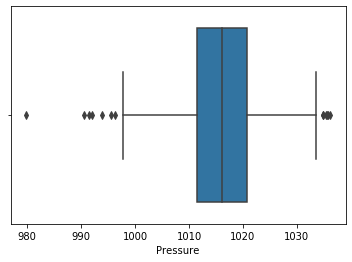

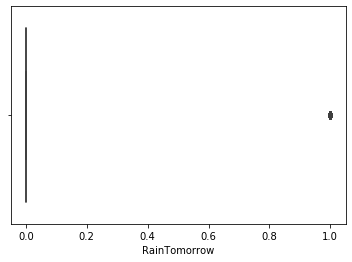

In [16]:
y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)

num_cols=df.select_dtypes(np.number)
for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

In [38]:
# there are outliers in the data so removing them by iqr method

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
ll = q1-(1.5*IQR)
ul = q3+(1.5*IQR)
df=df[~((df<ll) | (df>ul))]
df=df.dropna()
df.shape

(1144, 8)

In [39]:
df.dropna()

,Obs_Id,Evaporation,Sunshine,Temp,Wind_Speed,Humidity,Pressure,RainTomorrow
0,1,1.0,3.0,14.225,12.333333,82.0,1028.10,0.0
2,3,0.6,1.5,10.175,16.666667,87.0,1026.45,0.0
4,5,3.0,3.6,18.725,35.333333,81.5,1005.60,0.0
5,6,3.0,11.3,15.125,43.666667,59.5,1016.80,0.0
6,7,7.0,8.5,24.325,14.000000,57.0,1011.00,0.0
...,...,...,...,...,...,...,...,...
1515,1516,8.6,11.2,29.650,22.666667,46.5,1012.35,0.0
1516,1517,4.0,10.9,29.175,17.333333,67.5,1011.05,0.0
1517,1518,3.4,9.3,14.250,18.333333,61.5,1027.15,0.0
1518,1519,5.4,11.0,18.925,24.666667,69.0,1017.00,0.0


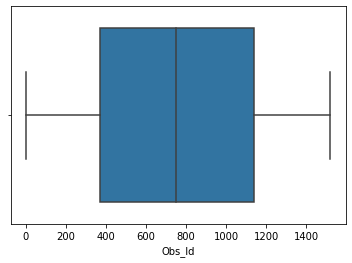

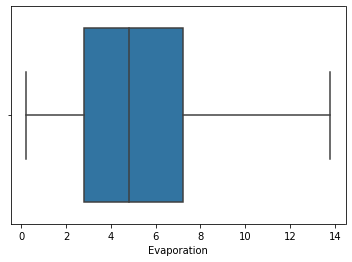

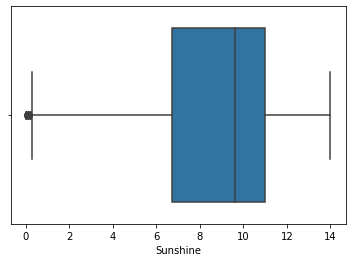

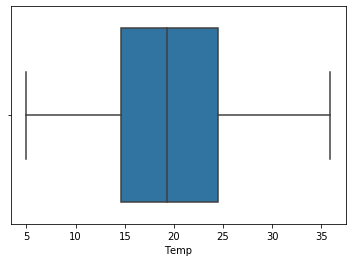

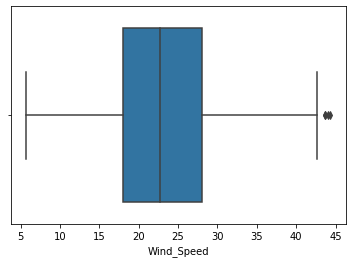

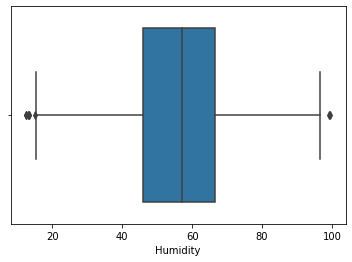

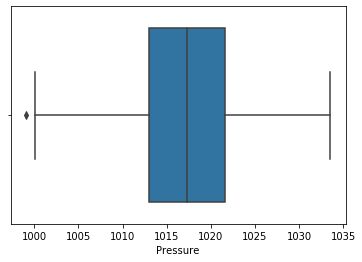

In [40]:
y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)

num_cols=x.select_dtypes(np.number)

for i in num_cols.columns:
    sns.boxplot(df[i])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is scaling required for the KNN algorithm? If yes, scale the data such that the range of each variable will be between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# yes scaling is required for knn algorithm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

mm=MinMaxScaler()
x_trains=mm.fit_transform(x_train)
x_tests=mm.fit_transform(x_test)
xs=mm.fit_transform(x)

x_trains=pd.DataFrame(x_trains,columns=x.columns)
x_tests=pd.DataFrame(x_tests,columns=x.columns)
xs=pd.DataFrame(xs,columns=x.columns)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a 7-NN model on 70% of the data using the 'Chebyshev' distance and find its accuracy 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
y=df['RainTomorrow']
x=df.drop('RainTomorrow',axis=1)

knn=KNeighborsClassifier(n_neighbors=7,metric='chebyshev')
knn.fit(x_trains,y_train)

y_test_pred=knn.predict(x_tests)
y_test_prob=knn.predict_proba(x_tests)[:,0]

accuracy_score(y_test,y_test_pred)

1.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the best value of 'K' for the KNN model from the given list of values (use 5-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

K = [3, 5, 7, 9, 11, 13]

In [43]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

knn=KNeighborsClassifier()
param={'n_neighbors':[3,5,7,9,11,13]}

gsearch=GridSearchCV(knn,param_grid=param,cv=5,scoring='roc_auc',n_jobs=-1)
gsearch.fit(xs,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13]},
             scoring='roc_auc')

In [44]:
gsearch.best_params_

{'n_neighbors': 3}

In [45]:
# the best value of k from the given values is 3

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a naive bayes model on 70% of the original data and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

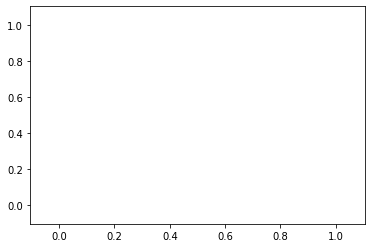

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,classification_report,accuracy_score

gnb = GaussianNB()
gnb.fit(x_trains,y_train)

y_test_pred = gnb.predict(x_tests)
y_test_prob = gnb.predict_proba(x_tests)


fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'r')
plt.plot(tpr,tpr,'g')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which distance metric among 'manhattan', 'euclidean' and 'chebyshev' is suitable for the given dataset? (consider K = 19)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':[19],
       'metric':['manhattan','euclidean','chebyshev']}
gsearch=GridSearchCV(knn,param_grid=params,cv=3,scoring='roc_auc',n_jobs=-1)
gsearch.fit(xs,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'n_neighbors': [19]},
             scoring='roc_auc')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the euclidean distance between the first observation of the dataframe 'X_test_scaled' and its five neighboring points in the train set (use for loop)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the parameters obtained in Q8 to build the KNN model, and find the number of false predictions using the test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
knn = KNeighborsClassifier(n_neighbors=19,metric='manhattan')
knn.fit(x_trains,y_train)

y_test_pred = knn.predict(x_tests)
y_test_prob = knn.predict_proba(x_tests)[:,1]

cm = confusion_matrix(y_test,y_test_pred)
FP = cm[0,1]
FN = cm[1,0]
print("number of false predictions using test set: ",FP+FN)

IndexError: index 1 is out of bounds for axis 1 with size 1